In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from scipy.stats import mstats
import statsmodels.formula.api as smf
import os

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [3]:
df = pd.read_excel("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", skiprows=4)

---

Cleaning Data

In [4]:
df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df['Property_Crime'] = df['Property\ncrime']
df['Rape'] = df['Rape\n(revised\ndefinition)1']
df['Rapeleg'] = df['Rape\n(legacy\ndefinition)2']
df['Arson3'] = df['Arson3']
df['AA'] = df['Aggravated\nassault']
df['Larceny'] = df['Larceny-\ntheft']
df['GTA'] = df['Motor\nvehicle\ntheft']
df['Population'] = np.log(df['Population'])
#df['Population'] = mstats.winsorize(df['Population'], limits=0.05)

In [5]:
data = df[['Population', 'Murder', 'Property_Crime', 'Rapeleg', 'Arson3', 'AA', 'GTA', 'Burglary', 'Larceny','Robbery',]].fillna(0)

---

Exploring the Data

In [124]:
im=smf.ols(formula='Population~Murder+Property_Crime+Rapeleg+Arson3+AA+GTA+Burglary+Larceny+Robbery', data=data).fit()

In [125]:
im.params
im.pvalues
im.rsquared
im.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     20.65
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           1.69e-25
Time:                        17:54:37   Log-Likelihood:                 441.06
No. Observations:                 351   AIC:                            -864.1
Df Residuals:                     342   BIC:                            -829.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2788      0.004    -63.930      0.000      -0.287      -0.270
Murder            -0.0045      0.005     -0.863      0.389      -0.015       0.006
Property_Crime     0.0002   9.38e-05      2.186      0.030    2.05e-05       0.000
Rapeleg           -0.0012      0.002     -0.653      0.514      -0.005       0.002
Arson3            -0.0007      0.001     -0.871      0.385      -0.002       0.001
AA                -0.0002      0.000     -0.824      0.411      -0.001       0.000
GTA                0.0005      0.000      1.342      0.181      -0.000       0.001
Burglary          -0.0002      0.000     -1.045      0.297      -0.001       0.000
Larceny        -7.811e-05   9.33e-05     -0.838      0.403      -0.000       0.000
Robbery           -0.0006      0.000     -1.756      0.080      -0.001    7.74e-05
==============================================================================
Omnibus:                       22.876   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.903
Skew:                           0.182   Prob(JB):                     2.97e-15
Kurtosis:                       5.107   Cond. No.                     4.31e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

---

Windsorize Data and Re-Explore

In [126]:
def remove_outliers(data):
    return mstats.winsorize(data, limits=0.05)

for d in data.columns:
    data[d] = remove_outliers(data[d])

In [127]:
im=smf.ols(formula='Population~Murder+Property_Crime+Rapeleg+Arson3+AA+GTA+Burglary+Larceny+Robbery', data=data).fit()

In [128]:
im.params
im.pvalues
im.rsquared
im.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     41.37
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           1.36e-49
Time:                        17:54:44   Log-Likelihood:                 544.18
No. Observations:                 351   AIC:                            -1068.
Df Residuals:                     341   BIC:                            -1030.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2947      0.004    -79.535      0.000      -0.302      -0.287
Murder             0.0094      0.008      1.172      0.242      -0.006       0.025
Property_Crime     0.0003      0.000      1.529      0.127   -7.52e-05       0.001
Rapeleg           -0.0024      0.002     -1.136      0.257      -0.007       0.002
Arson3             0.0030      0.004      0.756      0.450      -0.005       0.011
AA                 0.0006      0.000      1.468      0.143      -0.000       0.001
GTA            -6.279e-05      0.001     -0.103      0.918      -0.001       0.001
Burglary           0.0001      0.000      0.513      0.609      -0.000       0.001
Larceny           -0.0001      0.000     -0.744      0.458      -0.000       0.000
Robbery           -0.0018      0.001     -2.847      0.005      -0.003      -0.001
==============================================================================
Omnibus:                        1.729   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.796
Skew:                           0.137   Prob(JB):                        0.407
Kurtosis:                       2.780   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

Finding Correlation for feature selection

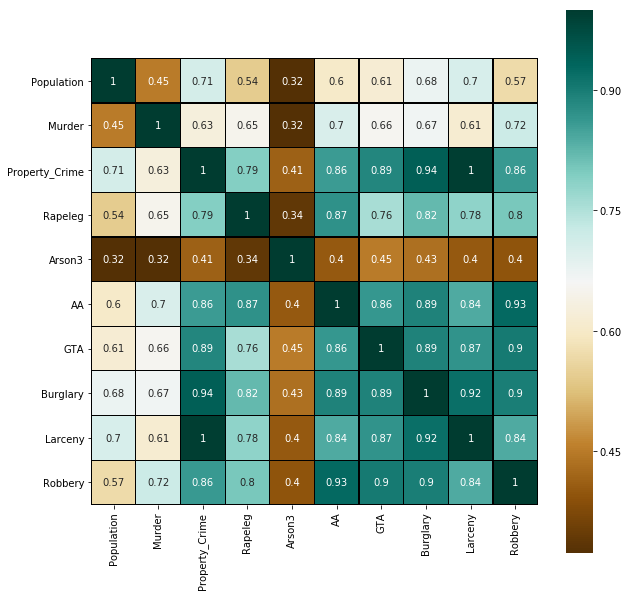

In [129]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

---

Creating Features

In [130]:
data2 = pd.DataFrame()

In [131]:
data2['Population'] = data['Population']
data2['Population2'] = data['Population']**2
data2['Murder'] = data['Murder']
data2['Robbery'] = data['Robbery']
data2['Property_Crime'] = data['Property_Crime']
data2['Arson3'] = data['Arson3']
data2['AA'] = data['AA']
data2['Rapleg'] = df['Rapeleg']
data2['GTA'] = df['GTA']
data2['Burglary'] = data['Burglary']
data2['Larceny'] = data['Larceny']
data2['Robbery'] = data['Robbery']

data2.shape

(351, 11)

---

Building and Fitting the Linear Regression Model

In [132]:
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['Murder','Robbery','Property_Crime']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.01031921 -0.00104261  0.00016629]]

Intercept: 
 [-0.2923396]

R-squared:
0.5120108275760741


In [133]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Robbery,Property_Crime
Murder,1.000,0.721,0.628
Robbery,0.721,1.000,0.861
Property_Crime,0.628,0.861,1.000


---

Extracting Predicted Values

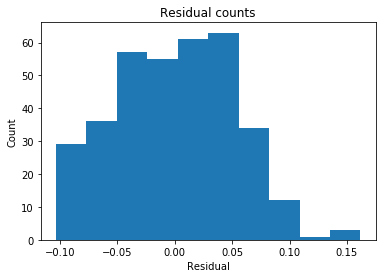

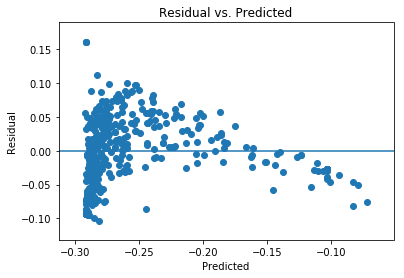

In [134]:
predicted = regr.predict(X).ravel()
actual = data2['Population']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
plt.title('Residual vs. Predicted')
plt.show()

In [135]:
model = regr.fit(X, Y)
cross_val_score(model, X, Y, cv=5)

array([0.57173737, 0.49083362, 0.43136523, 0.53036551, 0.44647343])

---

Adjusting the skewness

In [136]:
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['Murder','Robbery','Property_Crime']]
rob_2 = [math.sqrt(x) for x in data['Robbery']]
murd2 = [math.sqrt(x) for x in data['Murder']]
X = data[['Property_Crime']]
X['rob_2'] = rob_2
X['murd2'] = murd2
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 8.50862145e-05  1.18216279e-02 -4.48669365e-03]]

Intercept: 
 [-0.29332098]

R-squared:
0.5229904835512291


C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


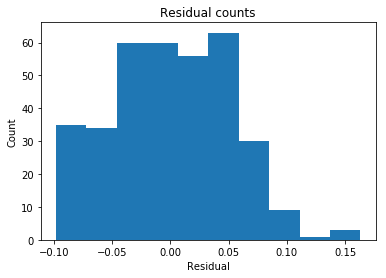

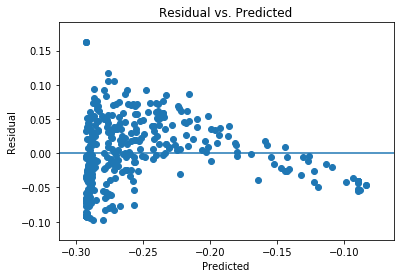

In [137]:
predicted = regr.predict(X).ravel()
actual = data2['Population']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
plt.title('Residual vs. Predicted')
plt.show()

In [138]:
X.corr()

,Property_Crime,rob_2,murd2
Property_Crime,1.000,0.898,0.613
rob_2,0.898,1.000,0.656
murd2,0.613,0.656,1.000
